In [4]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from helpers import *
%matplotlib inline

In [5]:
# generate data
xobs = -np.pi + 2*np.pi*np.random.random(50)
yobs = -np.sin(xobs)**3 + np.cos(xobs)**3 + 0.1*np.random.randn(len(xobs))

In [6]:
# define the fitting grid
xfittest = np.linspace(-np.pi,np.pi,50)
ytrue = -np.sin(xfittest)**3 + np.cos(xfittest)**3
n = len(xfittest)

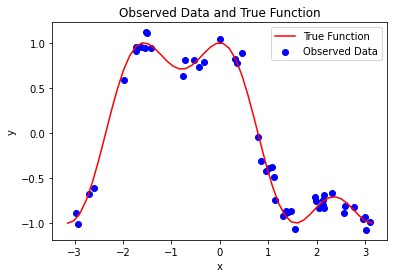

In [7]:
plt.scatter(xobs, yobs, label='Observed Data', color='blue')
plt.plot(xfittest, ytrue, label='True Function', color='red')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data and True Function')
plt.savefig("toy_samples_figures/original.pdf", format="pdf", bbox_inches="tight")
plt.show()

Best parameters: corrlen=1.1555555555555557, sigma=2.0, energy=1.1555555555555557
        Model  Mean Squared Error  Mean Absolute Error
0  exp square            0.001475             0.033539
1    rat quad            0.003335             0.044851
2     orn uhl            0.035278             0.153887


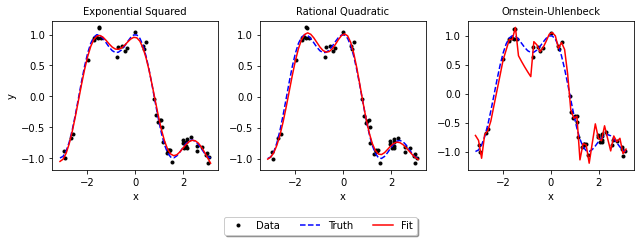

In [8]:
perf_df, fig = fit_gp_gammy(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure1.pdf", format="pdf", bbox_inches="tight")
print(perf_df)
plt.show()

                           Model  Mean Squared Error  Mean Absolute Error
0                     exp square            0.001475             0.033539
1                       rat quad            0.003335             0.044851
2                        orn uhl            0.035278             0.153887
3                         Smooth            0.005154             0.056590
4              Smooth + Periodic            0.005225             0.059904
5  Smooth + Periodic + Symmetric            0.002898             0.047288


<Figure size 648x216 with 0 Axes>

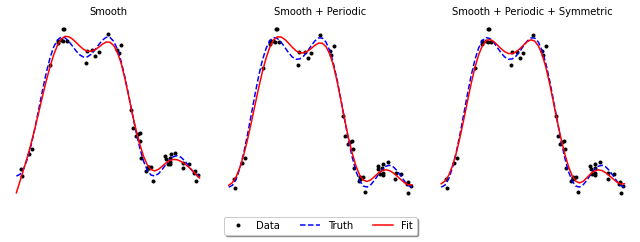

In [12]:
perf_lm, fig = fit_difference_priors(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure2.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([perf_df, perf_lm], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Mean Absolute Error
0                     exp square            0.001475             0.033539
1                       rat quad            0.003335             0.044851
2                        orn uhl            0.035278             0.153887
3                         Smooth            0.005154             0.056590
4              Smooth + Periodic            0.005225             0.059904
5  Smooth + Periodic + Symmetric            0.002898             0.047288
6              Linear Regression            0.530815             0.574122


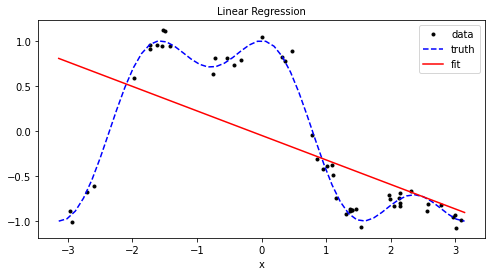

In [13]:
perf_df2, fig2 = fit_linear_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig2.savefig("toy_samples_figures/figure3.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_df2], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Mean Absolute Error
0                     exp square            0.001475             0.033539
1                       rat quad            0.003335             0.044851
2                        orn uhl            0.035278             0.153887
3                         Smooth            0.005154             0.056590
4              Smooth + Periodic            0.005225             0.059904
5  Smooth + Periodic + Symmetric            0.002898             0.047288
6              Linear Regression            0.530815             0.574122
7                  Random Forest            0.015741             0.087111


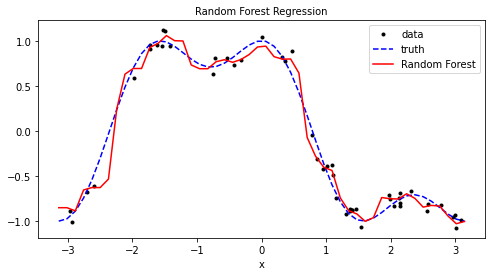

In [14]:
perf_rf, fig3 = fit_rf_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig3.savefig("toy_samples_figures/figure4.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_rf], ignore_index=True)
print(combined_df)
plt.show()

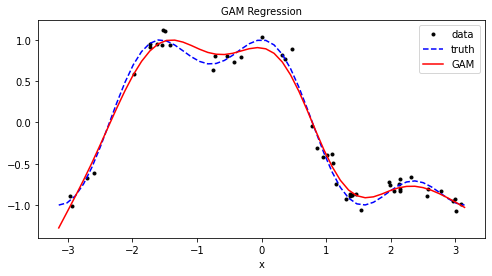

In [15]:
perf4, fig4 = fit_gam_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig4.savefig("toy_samples_figures/figure5.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf4], ignore_index=True)
plt.show()

In [16]:
result = pd.DataFrame(combined_df)
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Mean Absolute Error
0,exp square,0.00148,0.03354
1,rat quad,0.00334,0.04485
2,orn uhl,0.03528,0.15389
3,Smooth,0.00515,0.05659
4,Smooth + Periodic,0.00522,0.05990
5,Smooth + Periodic + Symmetric,0.00290,0.04729
6,Linear Regression,0.53082,0.57412
7,Random Forest,0.01574,0.08711
8,Frequentist Penalized Regression with B-splines,0.00702,0.06775
